In [1]:
import pandas as pd
df = pd.read_excel("nyc_repro_.xlsx")

df.head()

,Borough,Teen_Birth_Rate_per_1000,Clinic_Count,Uninsured_Rate_pct,Median_Income,Population
0,Bronx,12.9,17,12,38000,44788
1,Brooklyn,9.3,10,10,55000,98318
2,Queens,7.9,8,8,60000,56331
3,Manhattan,4.6,15,4,85000,37570
4,Staten Island,5.7,6,6,75000,14682


In [2]:
df['Borough'] = df['Borough'].str.strip()

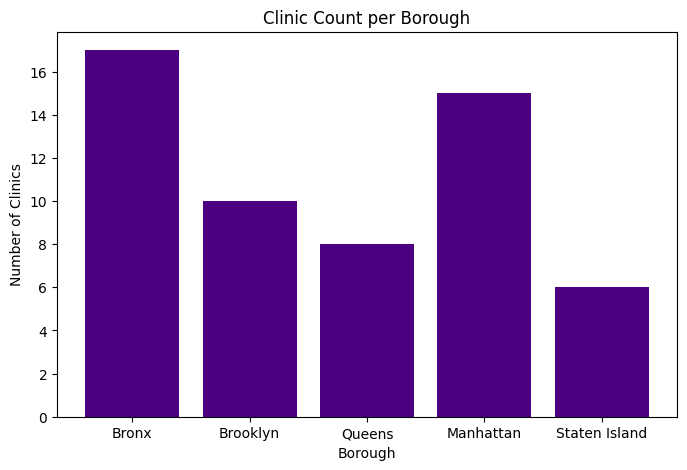

In [3]:
#Clinic Count per Borough
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(df['Borough'], df['Clinic_Count'], color='indigo')
plt.title('Clinic Count per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Clinics')
plt.show()

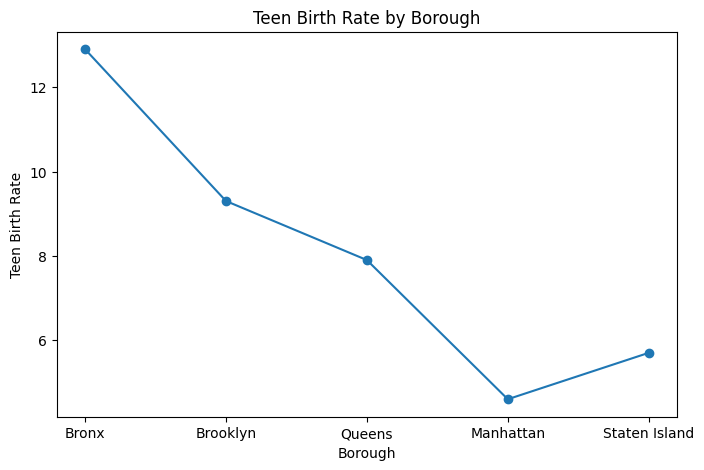

In [4]:
#Line chart of Teen Birth Rate by Borough
plt.figure(figsize=(8,5))
plt.plot(df['Borough'], df['Teen_Birth_Rate_per_1000'], marker='o')
plt.title('Teen Birth Rate by Borough')
plt.xlabel('Borough')
plt.ylabel('Teen Birth Rate')
plt.show()

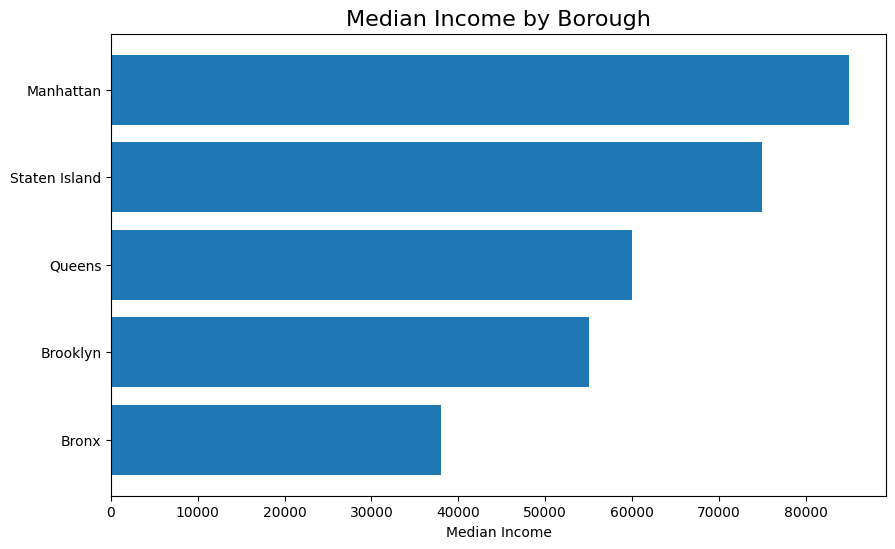

In [5]:
#Bar Chart of Median Income
sorted_df = df.sort_values('Median_Income', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Borough'], sorted_df['Median_Income'])
plt.xlabel('Median Income')
plt.title('Median Income by Borough', fontsize=16)
plt.show()

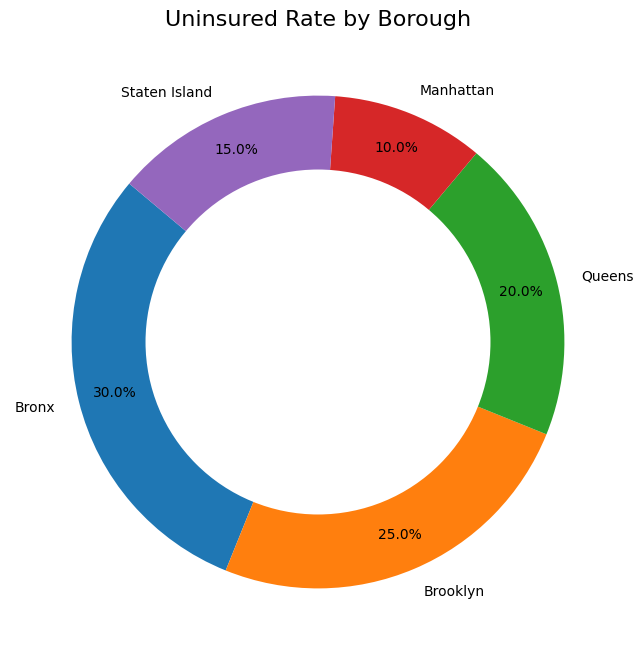

In [6]:
#Donut chart of uninsured rate by Borough
boroughs = df['Borough']
uninsured_rate = df['Uninsured_Rate_pct']

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(uninsured_rate, labels=boroughs, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Uninsured Rate by Borough', fontsize=16)
plt.show()

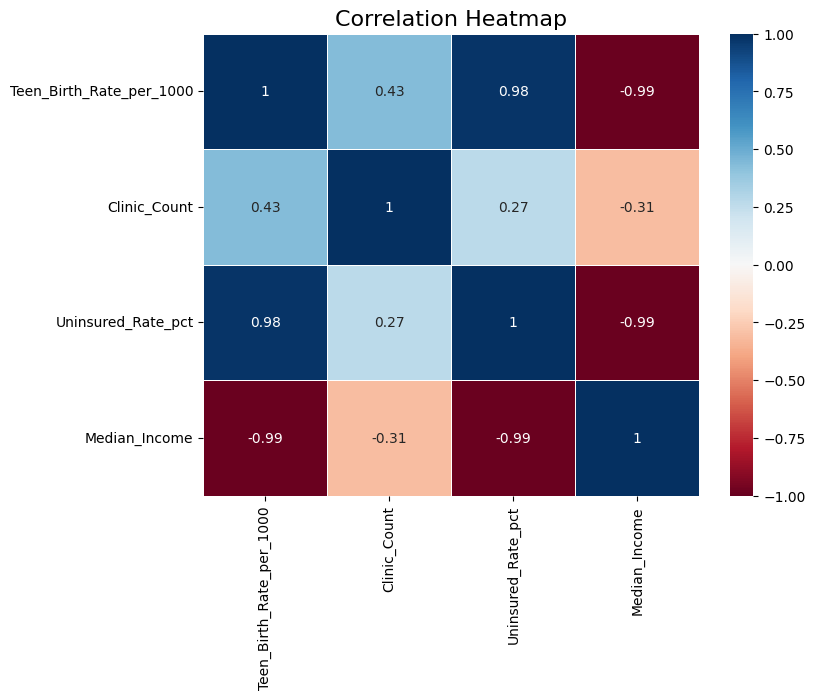

In [7]:
#Heatmap Correlation
import seaborn as sns
corr = df[['Teen_Birth_Rate_per_1000', 'Clinic_Count', 'Uninsured_Rate_pct', 'Median_Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

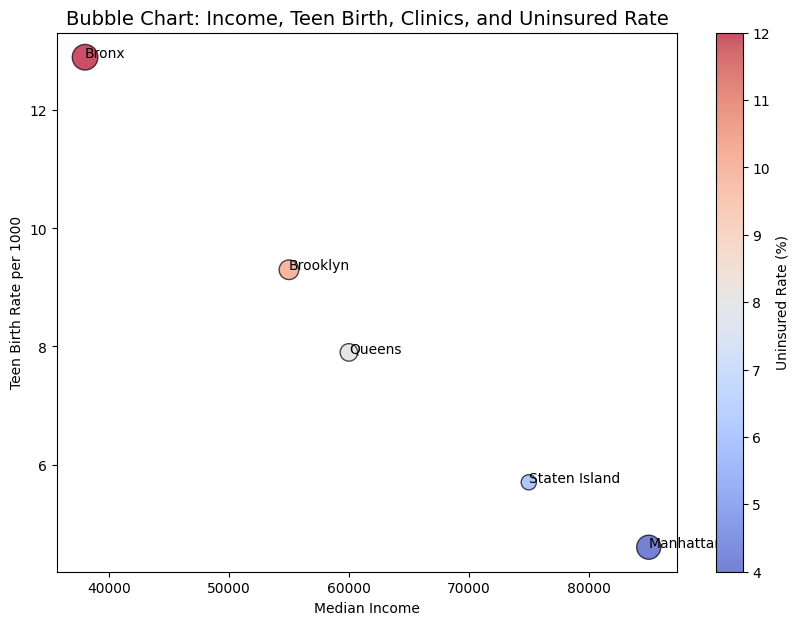

In [8]:
plt.figure(figsize=(10, 7))

# Bubble chart
scatter = plt.scatter(
    df['Median_Income'],
    df['Teen_Birth_Rate_per_1000'],
    s=df['Clinic_Count']*20,   # Bubble size proportional to clinic count
    c=df['Uninsured_Rate_pct'], # Color = uninsured rate
    cmap='coolwarm', alpha=0.7, edgecolors='k'
)

# Labels
for i, txt in enumerate(df['Borough']):
    plt.annotate(txt, (df['Median_Income'][i], df['Teen_Birth_Rate_per_1000'][i]))

plt.colorbar(scatter, label='Uninsured Rate (%)')
plt.xlabel('Median Income')
plt.ylabel('Teen Birth Rate per 1000')
plt.title('Bubble Chart: Income, Teen Birth, Clinics, and Uninsured Rate', fontsize=14)
plt.show()